## Introduction

![EDA_illustration](./doc/images/placeholder.png)

<div style="background-color: rgb(40, 40, 40); padding: 20px">
Data science is an interdisciplinary field that involves the use of statistical, computational, and machine learning techniques to extract insights and knowledge from data.
</div>

<div style="background-color: rgb(40, 40, 40); padding: 20px">
Data Engineers are professionals who specialize in handling and managing large volumes of data. They write computer programs and use various tools to build data pipelines that transform raw data into a more usable format for different teams within a company, including Business Intelligence Analysts, Data Analysts, Data Scientists, Machine Learning Engineers, and Database Administrators.
</div>

The goal of this project was to gather job postings for `"Data Engineer"` positions from www.glassdoor.com and analyze them to identify average salaries, working conditions, benefits, required skills, and trends. The data was collected between `11-04-2023` and `15-04-2023` from `32 countries`, including the USA and Canada, Europe, South East Asia, and Oceania.<br><br>The scraper utilized the Selenium package to provide the necessary client interaction to extract posting information, with a maximum cap of `900 jobs per selected country`. Due to Glassdoor's behavior, the number of job postings was often reduced from `900` to `300` or less after eliminating duplicates. Sometimes, Glassdoor listed irrelevant positions like "Android Mobile Developer" or "Outside Sales Representative" for a "Data Engineer" query, causing the number to drop further.<br><br>
The final number of job entries is `3117` positions.<br>That spans countries in North America, Europe, South East Asia, and Oceania.<br><br>
It is important to note that the data used in this analysis was obtained by separately scraping job postings for each country, which means that direct comparisons between countries may not be appropriate and the data should be interpreted with caution. Additionally, please keep in mind that there is a cap of 900 in the salary data for some countries, which may impact the accuracy of the comparison.
<br><br>This project was inspired by [Ken Jee's work](https://github.com/PlayingNumbers), and the author would like to extend special thanks to him.

## Table of content

# todo

## About the data

The whole dataset was scraped from [glassdoor.com](www.glassdoor.com)

<img src="doc\images\Glassdoor-Logo.png"  width="60%" height="60%">

<div style="background-color: rgb(40, 40, 40); padding: 20px">
"Our site offers millions of the latest job listings, combined with a growing database of company reviews, CEO approval ratings, salary reports, interview reviews and questions, benefits reviews, office photos, and more. Unlike other job sites, all of the information on our site is shared by those who know a company best - the employees."
</div>

### Before Cleaning

In the RAW format, each job contains the following information:
- Company_name
- Rating
- Location
- Job_title
- Description
- Job_age
- Easy_apply
- Salary
- Employees
- Type_of_ownership
- Sector
- Founded
- Industry
- Revenue_USD
- Friend_recommend
- CEO_approval
- Career_opportunities
- Comp_&_benefits
- Culture_&_values
- Senior_management
- Work/Life_balance
- Pros
- Cons
- Benefits_rating
- Benefits_reviews

### After Cleaning

After cleaning and enriching data we have the following columns in multi-index:

**Job_details**

| columns | description (examples) | data type |
|---|---|---|
| Title                                             | Data Engineer, BI Engineer...                                     | string |
| Description                                       | The description provided by company                               | string |
| Seniority                                         | Junior, Mid, Senior, Management                                   | string |
| City                                              | Los Angeles, e.g.                                                 | string |
| State                                             | California, e.g.                                                  | string |
| Country                                           | United States, e.g.                                               | string |
| Region                                            | North America, e.g. (and Europe, South East Asia, Oceania)        | string |
| Job_age                                           | 1 to 31 (max value, in that case it means "31+ days")                  |  int   |
| Easy_apply                                        | Y/N (applying via glassdoor)                                      |  bool  |

**Salary**<br>
All float values are in USD
| columns | description (examples) | data type |
|---|---|---|
| Min                                               | Minimal buck in local currency for the position in the company    | float  |
| Max                                               | Maximal buck in local currency for the position in the company    | float  |
| Avg                                               | The inner value between the minimal and the maximal               | float  |
| Currency (ISO 3 letters standard)                 | The currency in which the salary is paid:<br>USD, EUR, CAD, DKK, HDK, NZD, NOK, PLN, RON, SGD, SEK, CHF, GBP   | string |
| Employer_provided                                 | Y/N (Does the employer provide pay scale ranges)                  |  bool  |
| Is_hourly                                         | Y/N (Paid by number of worked hours, or monthly)                  |  bool  |
| Specified                                         | Y/N (Is or is not salary mentioned in the posting, includes also undefined)                 |  bool  |

**Company_info**
| columns | description (examples) | data type |
|---|---|---|
| Name                                          | The Great company Co., Ausgezeichnete Gmbh...                             | string|
| Rating                                        | 0.0-5.0, The rating of the company                                        |  int  |
| Employees                                     | 1 to 50, 51 to 200, 501 to 1000, 1001 to 5000, 5001 to 10000, 10000+      | string|
| Type_of_ownership                             | Company - Private, Company - Public, Subs...                              | string|
| Sector                                        | Information Technology, Human Resources & Staffing...                     | string|
| Industry                                      | Information Technology Support Services, HR Consulting...                 | string|
| Company_age                                   | 2, 12, 333... (The numbers of years in 2023)                              |  int  |
| Revenue_USD                                   | Less than $1 million, $1 to $5 million                                    | string|
| Friend_recommend                              | 0.00 to 1.00 (0% to 100%)                                                 | float |
| CEO_approval                                  | 0.00 to 1.00 (0% to 100%)                                                 | float |
| Career_opportunities                          | 0.0 to 5.0                                                                | float |
| Comp_&_benefits                               | 0.0 to 5.0                                                                | float |
| Senior_management                             | 0.0 to 5.0                                                                | float |
| Work/Life_balance                             | 0.0 to 5.0                                                                | float |
| Culture_&_values                              | 0.0 to 5.0                                                                | float |
| Pros                                          | Pay good money, work isn't too difficult" (in 2 reviews), ...             |list[str]|
| Cons                                          | "The pay could be better." (in 7 reviews), "Boss culture" (in 6 reviews)..|list[str]|
| Benefits_rating                               | 0.0 to 5.0                                                                | float |
| Benefits_reviews                              | 0.0 to 5.0                                                                | float |

---

(Below are the requirements extracted from the job description)

**Education**

| columns | description (examples) | data type |
|---|---|---|
| BA                                            | Y/N                                   |  bool  |
| MS                                            | Y/N                                   |  bool  |
| Phd                                           | Y/N                                   |  bool  |
| Certificate                                | Nanodegree, DataCamp, ..., Other      | string |

**Version_control**

| columns | description (examples) | data type |
|---|---|---|
| Git                                           | Github, GitLab, ..., Git (subset of any previous) | string |

**Cloud_platforms (Top 10)**

| columns | description (examples) | data type |
|---|---|---|
| AWS                                           | Y/N   |  bool  |
| Microsoft_Azure                               | Y/N   |  bool  |
| GPC                                           | Y/N   |  bool  |
| Alibaba                                       | Y/N   |  bool  |
| Oracle                                        | Y/N   |  bool  |
| IBM                                           | Y/N   |  bool  |
| Tencent                                       | Y/N   |  bool  |
| OVHcloud                                      | Y/N   |  bool  |
| DigitalOcean                                  | Y/N   |  bool  |
| Lincode                                       | Y/N   |  bool  |

**RDBMS (Relational Database Management System)**

| columns | description (examples) | data type |
|---|---|---|
| PostgreSQL                                    | Y/N |  bool  |
| Microsoft_SQL_Server                          | Y/N |  bool  |
| IBM_Db2                                       | Y/N |  bool  |
| MySQL                                         | Y/N |  bool  |
| Oracle_PL_SQL'                                | Y/N |  bool  |

**NOSQL (not only SQL)**

| columns | description (examples) | data type |
|---|---|---|
| MongoDB                                       | Y/N |  bool  |
| Cassandra                                     | Y/N |  bool  |
| Amazon_DynamoDB                               | Y/N |  bool  | 
| Neo4j                                         | Y/N |  bool  |

**Search_&_Analytics**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Solr                                   | Y/N |  bool  |
| Amazon_Redshift                               | Y/N |  bool  |
| Google_BigQuery                               | Y/N |  bool  |
| Snowflake                                     | Y/N |  bool  |
| Oracle_Exadata                                | Y/N |  bool  |
| SAP_HANA                                      | Y/N |  bool  |
| Teradata                                      | Y/N |  bool  |

**Data_integration_and_processing**

| columns | description (examples) | data type |
|---|---|---|
| Informatica_PowerCenter                       | Y/N |  bool  |
| Databricks                                    | Y/N |  bool  |
| Presto                                        | Y/N |  bool  |

**Stream_processing_tools**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Kafka                                  | Y/N |  bool  |     
| Apache_Flink                                  | Y/N |  bool  |
| Dataflow                                      | Y/N |  bool  |

**Workflow_orchestration_tools**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Airflow                                | Y/N |  bool  |
| Luigi                                         | Y/N |  bool  |
| SSIS                                          | Y/N |  bool  |

**Big_Data_processing**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Hadoop                                 | Y/N |  bool  |
| Apache_Hive                                   | Y/N |  bool  |
| Apache_Spark                                  | Y/N |  bool  |

**OS**
(Operating system/systems)

| columns | description (examples) | data type |
|---|---|---|
| Linux                                         | Y/N |  bool  |
| Unix                                          | Y/N |  bool  |
| Windows                                       | Y/N |  bool  |
| macOS                                         | Y/N |  bool  |

**Programming_languages**

| columns | description (examples) | data type |
|---|---|---|
| Python                                        | Y/N |  bool  |
| R                                             | Y/N |  bool  |
| Scala                                         | Y/N |  bool  |
| Julia                                         | Y/N |  bool  |
| SQL                                           | Y/N |  bool  |
| Java                                          | Y/N |  bool  |
| C++                                           | Y/N |  bool  |
| Go                                            | Y/N |  bool  |
| Bash                                          | Y/N |  bool  |
| PowerShell                                    | Y/N |  bool  |
| CLI                                           | Y/N |  bool  |

**Business_Intelligence_Tools**

| columns | description (examples) | data type |
|---|---|---|
| Tableau                                       | Y/N |  bool  |
| Power_BI                                      | Y/N |  bool  |
| Google_Analytics                              | Y/N |  bool  |
| QlikView                                      | Y/N |  bool  |
| Oracle_BI_server                              | Y/N |  bool  |
| SAS_Analytics                                 | Y/N |  bool  |
| Lumira                                        | Y/N |  bool  |
| Cognos_Impromptu                              | Y/N |  bool  |
| MicroStrategy                                 | Y/N |  bool  |
| InsightSquared                                | Y/N |  bool  |
| Sisense                                       | Y/N |  bool  |
| Dundas_BI                                     | Y/N |  bool  |
| Domo                                          | Y/N |  bool  |
| Looker                                        | Y/N |  bool  |
| Excel                                         | Y/N |  bool  |

### Basic Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = Path("data\clean\Data_Engineer\Data_Engineer_15-04-2023.csv")
data = pd.read_csv(file_path, index_col=0, header=[0, 1])

In [3]:

print(f"Summary Of The Dataset :")
data.describe()

Summary Of The Dataset :


Job_details         Salary                               Company_info  \
           Job_age            Min            Max            Avg       Rating   
count  3117.000000     776.000000     780.000000     776.000000  2615.000000   
mean     22.440808   81561.865979  103143.353846   92490.216495     3.970975   
std      10.799407   39395.330601   42348.078464   38865.534283     0.561581   
min       1.000000   20240.000000   20240.000000   20240.000000     1.000000   
25%      13.000000   53064.000000   71870.000000   62442.750000     3.700000   
50%      31.000000   72442.500000   94663.500000   83632.250000     4.000000   
75%      31.000000  105763.000000  131250.000000  119500.000000     4.300000   
max      31.000000  325704.000000  271429.000000  227541.000000     5.000000   

                                                                       \
       Company_age Friend_recommend CEO_approval Career_opportunities   
count  1734.000000      2514.000000  1706.000000          2558.000000   
mean     47.799885         0.775625     0.841014             3.715364   
std      52.673791         0.158588     0.149065             0.593382   
min       2.000000         0.090000     0.130000             1.000000   
25%      15.000000         0.690000     0.780000             3.400000   
50%      28.000000         0.800000     0.880000             3.700000   
75%      56.000000         0.890000     0.940000             4.000000   
max     333.000000         1.000000     1.000000             5.000000   

                                                                            \
      Comp_&_benefits Senior_management Work/Life_balance Culture_&_values   
count     2555.000000       2554.000000       2554.000000      2553.000000   
mean         3.653699          3.620399          3.806774         3.843517   
std          0.627637          0.665408          0.597282         0.632869   
min          1.000000          1.000000          1.000000         1.000000   
25%          3.300000          3.200000          3.400000         3.500000   
50%          3.700000          3.600000          3.800000         3.900000   
75%          4.000000          4.000000          4.200000         4.200000   
max          5.000000          5.000000          5.000000         5.000000   

                       
      Benefits_rating  
count     1186.000000  
mean         3.958432  
std          0.647123  
min          1.000000  
25%          3.700000  
50%          4.000000  
75%          4.300000  
max          5.000000

In [4]:
from typing import Literal

def show_percentages(df: pd.DataFrame, type: Literal["bool", "string"] = "bool"):

    def to_percent(percentages: pd.DataFrame):
        return percentages.apply(lambda x: f'{x:.2%}')

    total_jobs = len(df)
    print(f"Number of jobs: {total_jobs}\n")

    result_df = None

    if type == "bool":

        summed = df.sum()
        percentages = df.mean()
        percentages_str = to_percent(percentages)
        result_df = pd.DataFrame({'Percentage of True Values': percentages_str, 'Occurrence': summed})

        num_of_none = (df == False).all(axis=1).sum()
        percentages_none = (num_of_none / total_jobs)
        percentages_none_str = f'{percentages_none:.2%}'

        result_df = result_df.append(pd.DataFrame({'Percentage of True Values': percentages_none_str, 'Occurrence': num_of_none}, index=["None"]))

        result_df.sort_values(ascending=False, by=['Occurrence'], inplace=True)

    elif type == "string":

        summed = df.value_counts()
        percentages = (df.value_counts() / total_jobs)
        percentages.sort_values(ascending=False, inplace=True)
        percentages_str = to_percent(percentages)
        result_df = pd.DataFrame({'Percentage of True Values': percentages_str, 'Occurrence': summed})

        num_of_none = df.isna().sum(skipna=False)
        percentages_none = (num_of_none / total_jobs)
        percentages_none_str = f'{percentages_none:.2%}'

        result_df = result_df.append(pd.DataFrame({'Percentage of True Values': percentages_none_str, 'Occurrence': num_of_none}, index=["None"]))
       

        result_df.sort_values(ascending=False, by=['Occurrence'], inplace=True)

    else:
        raise KeyError(f"Invalid type:\n{type}")      

    print(result_df)


In [5]:
data['Job_details'].describe(include=object)

,Title,Description,Seniority,City,State,Country,Region
count,3117,3117,684,2979,277,3117,3117
unique,1904,2947,4,558,39,32,4
top,Data Engineer,Canonical is building a comprehensive automati...,Senior,Tel Aviv-Yafo,England,Israel,Europe
freq,562,13,497,147,73,253,2376


In [6]:
show_percentages(data['Job_details']['Seniority'], "string")

Number of jobs: 3117

           Percentage of True Values  Occurrence
None                          78.06%        2433
Senior                        15.94%         497
Junior                         3.59%         112
Management                     1.51%          47
Mid                            0.90%          28


In [7]:
data['Job_details']['Country'].value_counts()

Israel            253
United_States     247
France            228
Portugal          189
Germany           166
Sweden            146
Austria           139
Singapore         138
Spain             127
Romania           125
United_Kingdom    121
Poland            110
Hong_Kong         105
Denmark            91
Hungary            86
Italy              80
Ireland            76
Czech_Republic     68
Australia          67
Belgium            64
Switzerland        60
Finland            58
Greece             56
New_Zealand        52
South_Korea        46
Japan              42
Netherlands        40
Taiwan             40
Luxembourg         40
Norway             31
Turkey             22
Canada              4
Name: Country, dtype: int64

In [8]:
data['Job_details']['City'].value_counts()[:10]

Tel Aviv-Yafo    147
Singapore        131
Portugal         119
Remote           102
Bucharest         89
Hong Kong         88
Paris             85
Israel            82
Stockholm         80
Vienna            71
Name: City, dtype: int64

In [9]:
num_remote = (data['Job_details']['City'] == 'Remote').sum()
job_total = len(data)
num_nan_locations = data['Job_details']['City'].isna().sum() 

print(
    f"""
    Job offers:
    {job_total}
    Remote offers:
    {num_remote}
    {(num_remote / job_total):.2%}
    Unknown precise location:
    {num_nan_locations}
    {(num_nan_locations / job_total):.2%}
    """
)

del num_remote, job_total, num_nan_locations


    Job offers:
    3117
    Remote offers:
    102
    3.27%
    Unknown precise location:
    138
    4.43%
    


In [10]:
show_percentages(data['Job_details']['Job_age'], "string")

Number of jobs: 3117

     Percentage of True Values  Occurrence
31                      53.38%        1664
1                        5.65%         176
13                       4.04%         126
7                        2.44%          76
14                       2.44%          76
8                        2.37%          74
6                        2.31%          72
11                       1.83%          57
5                        1.80%          56
15                       1.60%          50
19                       1.54%          48
20                       1.54%          48
28                       1.48%          46
12                       1.48%          46
21                       1.48%          46
2                        1.48%          46
22                       1.32%          41
26                       1.25%          39
18                       1.22%          38
10                       1.09%          34
27                       1.06%          33
9                        1.03%  

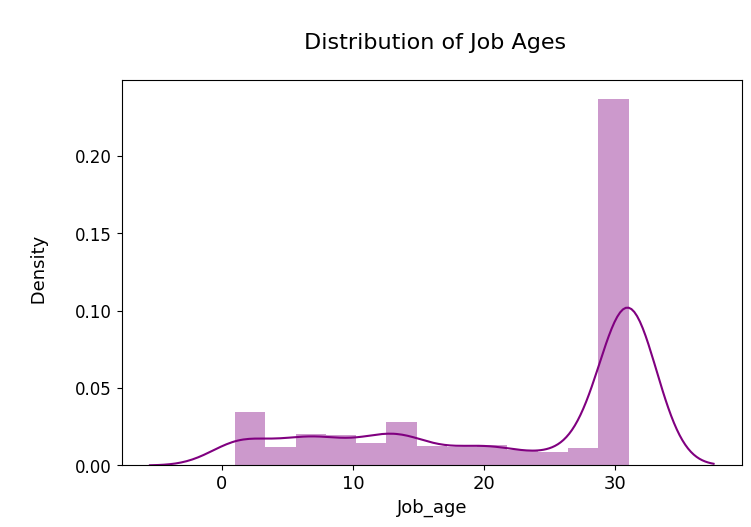

In [11]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Job Ages\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(data['Job_details']['Job_age'],color="purple")
plt.show()

In [12]:
jobs_total = len(data)
easy_apply = {
    "Y": data['Job_details']['Easy_apply'].sum(),
    "N": (~data['Job_details']['Easy_apply']).sum(),
}

print(
    f"""
    Easy apply:
    Y: {easy_apply['Y']}   {(easy_apply['Y'] / jobs_total):.2%}
    N: {easy_apply['N']}  {(easy_apply['N'] / jobs_total):.2%}
    """
)

del jobs_total, easy_apply


    Easy apply:
    Y: 724   23.23%
    N: 2393  76.77%
    


In [13]:
data['Salary'].describe(include=object)

,Currency
count,787
unique,15
top,EUR
freq,236


In [14]:
data['Salary']['Specified'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

False    74.75%
True     25.25%
Name: Specified, dtype: object

In [15]:
data['Salary']['Employer_provided'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

False    83.48%
True     16.52%
Name: Employer_provided, dtype: object

In [16]:
data['Salary']['Is_hourly'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

False    94.32%
True      5.68%
Name: Is_hourly, dtype: object

In [17]:
data['Company_info'].describe(include=object)

,Name,Employees,Type_of_ownership,Sector,Industry,Revenue_USD,Pros,Cons,Benefits_reviews
count,3117,2512,2657,2111,2111,1291,2422,2422,793
unique,1941,7,11,24,80,9,1420,1194,351
top,Gotfriends,10000+,Company - Private,Information Technology,Information Technology Support Services,$10+ billion,"['""Good people and good managers."" (in 3 revie...",['No Cons have been reported by the Glassdoor ...,"['401K Plan (573 comments)\n""6% Match best in ..."
freq,100,685,1551,791,349,376,100,484,32


In [18]:
data['Company_info']['Name'].value_counts()[:10]

Gotfriends                           100
SQlink                                84
Accenture                             32
Canonical - Jobs                      26
Nigel Frank International Limited     19
EPAM Systems                          18
EY                                    16
Vodafone                              16
ING                                   15
ROCKEN                                15
Name: Name, dtype: int64

In [54]:
def show_distribution(df: pd.DataFrame, title: str):
    plt.figure(figsize=(8,5))
    plt.title(f'\n Distribution of {title}\n', size=16, color='black')
    plt.xlabel('\n Rating \n', fontsize=13, color='black')
    plt.ylabel('\n Density\n', fontsize=13, color='black')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=12)
    sns.distplot(data['Company_info']['Rating'],color="purple")
    plt.show()


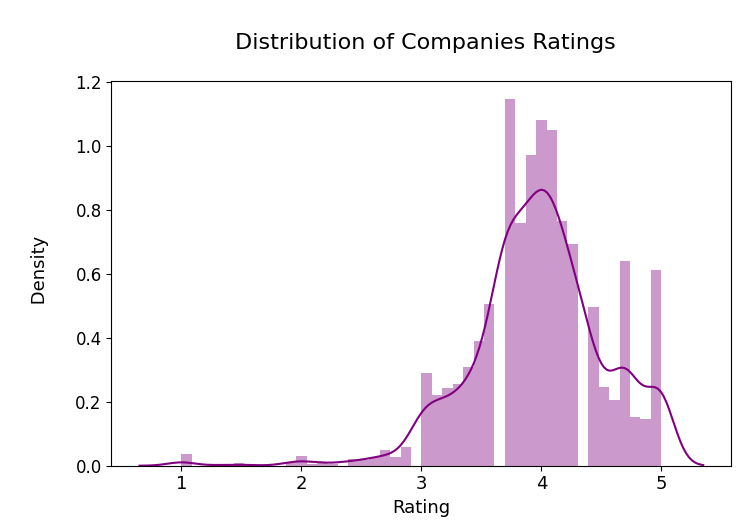

In [55]:
show_distribution(data['Company_info']['Rating'], "Companies Ratings")

In [ ]:

show_distribution()

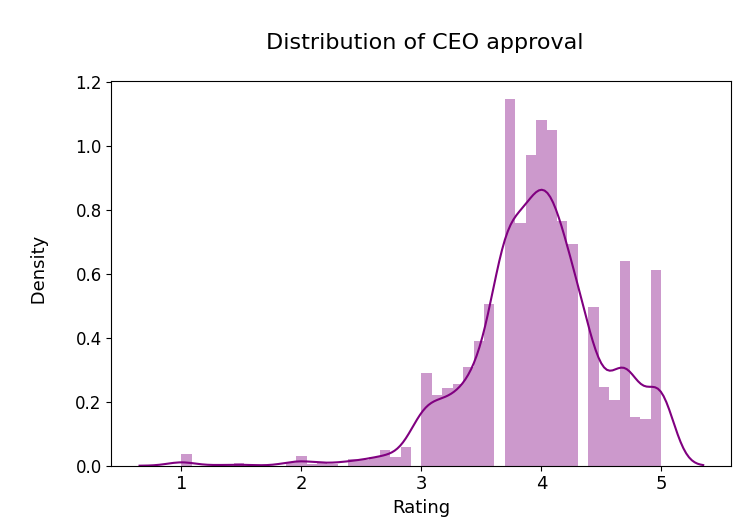

In [56]:
show_distribution(data['Company_info']['CEO_approval'], "CEO approval")

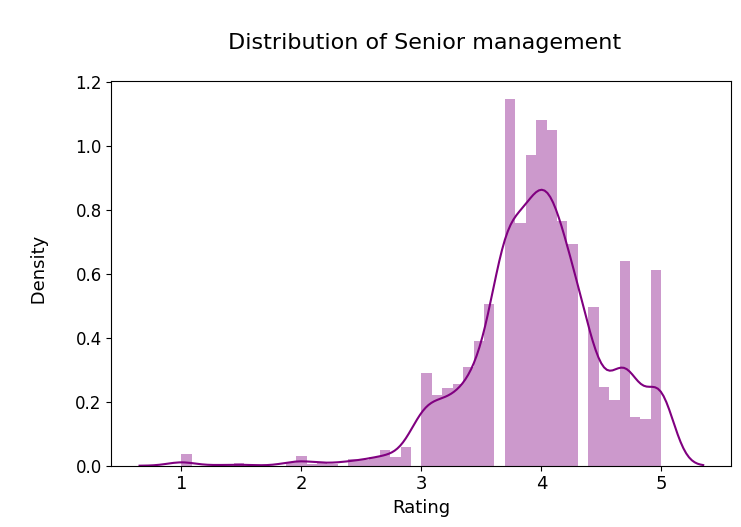

In [58]:
show_distribution(data['Company_info']['Senior_management'], "Senior management")

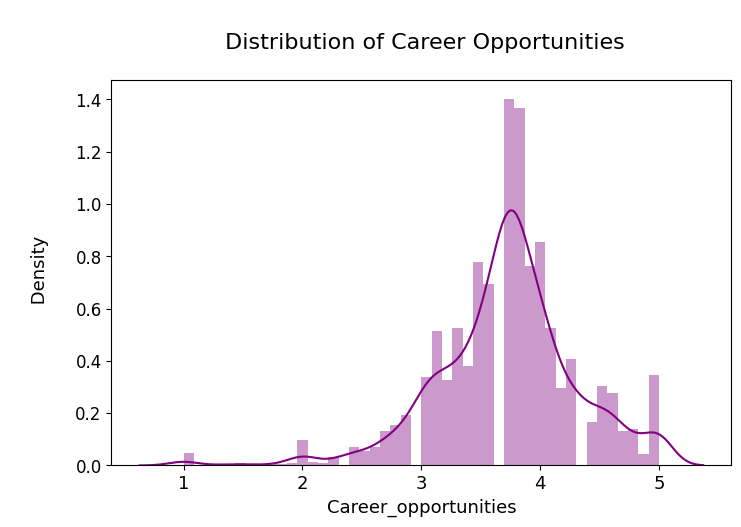

In [22]:
show_distribution(data['Company_info']['Career_opportunities'], "Career Opportunities")

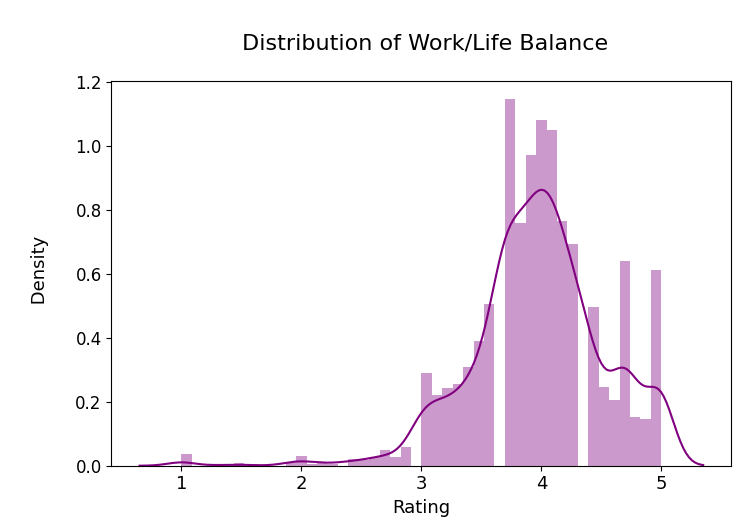

In [59]:
show_distribution(data['Company_info']['Work/Life_balance'], "Work/Life Balance")

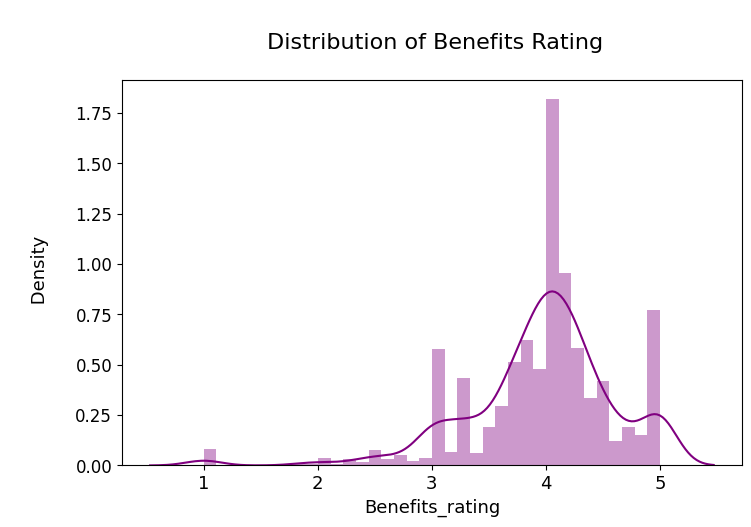

In [68]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Benefits Rating\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(data['Company_info']['Benefits_rating'],color="purple")
plt.show()

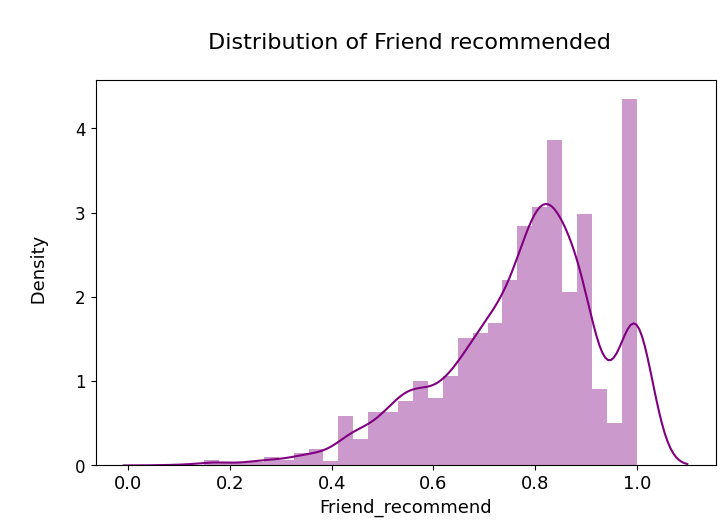

In [70]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Friend recommended\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(data['Company_info']['Friend_recommend'],color="purple")
plt.show()

In [71]:
del show_distribution

In [26]:
data['Company_info']['Employees'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

10000+           21.98%
NaN              19.41%
51 to 200        13.86%
1001 to 5000     13.22%
1 to 50          12.38%
201 to 500        7.99%
501 to 1000       7.15%
5001 to 10000     4.01%
Name: Employees, dtype: object

In [52]:
def value_counts_percent(df: pd.DataFrame):
    return df.value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

In [53]:
value_counts_percent(data['Company_info']['Revenue_USD'])

NaN                           58.58%
$10+ billion                  12.06%
$1 to $5 billion               6.80%
$100 to $500 million           5.49%
$25 to $100 million            5.29%
$5 to $25 million              3.63%
$5 to $10 billion              3.40%
$500 million to $1 billion     2.05%
$1 to $5 million               1.80%
Less than $1 million           0.90%
Name: Revenue_USD, dtype: object

In [48]:
value_counts_percent(data['Company_info']['Type_of_ownership'])

Company - Private                 49.76%
Company - Public                  28.78%
NaN                               14.76%
Subsidiary or Business Segment     2.69%
Self-employed                      0.99%
Government                         0.96%
Nonprofit Organization             0.67%
Private Practice / Firm            0.58%
Contract                           0.42%
College / University               0.32%
Name: Type_of_ownership, dtype: object

In [49]:
value_counts_percent(data['Company_info']['Sector'])

NaN                           32.27%
Information Technology        25.38%
Human Resources & Staffing     9.91%
Financial Services             6.32%
Management & Consulting        5.81%
Manufacturing                  4.40%
Media & Communication          2.34%
Energy, Mining & Utilities     1.67%
Telecommunications             1.60%
Retail & Wholesale             1.57%
Name: Sector, dtype: object

In [50]:
value_counts_percent(data['Company_info']['Industry'])

NaN                                        32.27%
Information Technology Support Services    11.20%
HR Consulting                               6.06%
Computer Hardware Development               5.81%
Enterprise Software & Network Solutions     4.46%
Business Consulting                         4.27%
Staffing & Subcontracting                   3.85%
Internet & Web Services                     2.63%
Investment & Asset Management               1.99%
Banking & Lending                           1.80%
Name: Industry, dtype: object

In [ ]:
del value_counts_percent

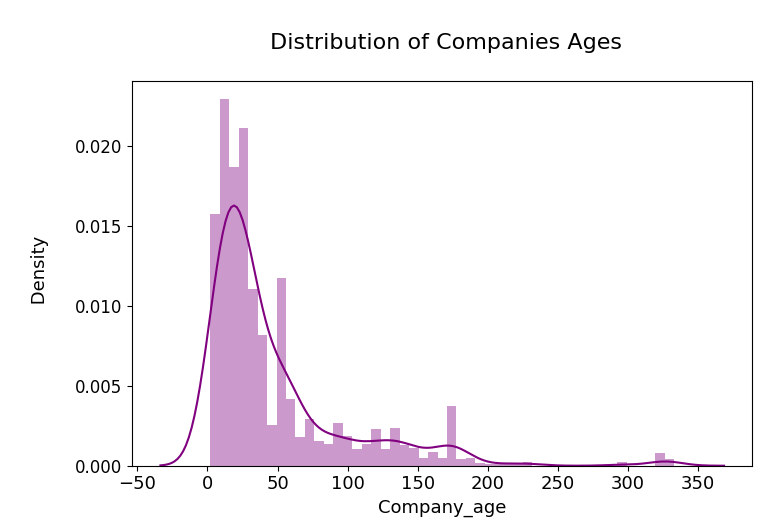

In [31]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Companies Ages\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(data['Company_info']['Company_age'],color="purple")
plt.show()

In [32]:
show_percentages(data['Education'][['BA', 'MS', 'Phd']])

Number of jobs: 3117

     Percentage of True Values  Occurrence
None                    93.17%        2904
MS                       4.04%         126
BA                       3.59%         112
Phd                      0.32%          10


In [33]:
show_percentages(data['Education']['Certificate'], "string")

Number of jobs: 3117

         Percentage of True Values  Occurrence
None                        99.55%        3103
Other                        0.42%          13
DataCamp                     0.03%           1


In [34]:
show_percentages(data['Version_control']['Git'], "string")

Number of jobs: 3117

          Percentage of True Values  Occurrence
None                         97.88%        3051
Git                           1.22%          38
GitLab                        0.55%          17
Github                        0.29%           9
Bitbucket                     0.03%           1
Launchpad                     0.03%           1


In [35]:
show_percentages(data['Cloud_platforms'])

Number of jobs: 3117

                Percentage of True Values  Occurrence
None                               81.65%        2545
Microsoft_Azure                     9.91%         309
AWS                                 8.73%         272
GPC                                 3.66%         114
Oracle                              0.13%           4
IBM                                 0.10%           3
Alibaba                             0.00%           0
Tencent                             0.00%           0
OVHcloud                            0.00%           0
DigitalOcean                        0.00%           0
Lincode                             0.00%           0


In [36]:
show_percentages(data['RDBMS'])

Number of jobs: 3117

                     Percentage of True Values  Occurrence
None                                    96.21%        2999
PostgreSQL                               1.64%          51
MySQL                                    1.64%          51
Microsoft_SQL_Server                     1.35%          42
Oracle_PL_SQL                            0.35%          11
IBM_Db2                                  0.10%           3


In [37]:
show_percentages(data['NOSQL'])

Number of jobs: 3117

                Percentage of True Values  Occurrence
None                               97.98%        3054
MongoDB                             1.44%          45
Cassandra                           0.55%          17
Amazon_DynamoDB                     0.29%           9
Neo4j                               0.06%           2


In [38]:
show_percentages(data['Search_&_Analytics'])

Number of jobs: 3117

                Percentage of True Values  Occurrence
None                               94.74%        2953
Snowflake                           2.73%          85
Google_BigQuery                     1.25%          39
Amazon_Redshift                     1.09%          34
Teradata                            0.67%          21
SAP_HANA                            0.22%           7
Apache_Solr                         0.06%           2
Oracle_Exadata                      0.03%           1


In [39]:
show_percentages(data['Data_integration_and_processing'])

Number of jobs: 3117

                        Percentage of True Values  Occurrence
None                                       95.93%        2990
Databricks                                  3.56%         111
Informatica_PowerCenter                     0.32%          10
Presto                                      0.22%           7


In [40]:
show_percentages(data['Search_&_Analytics'])

Number of jobs: 3117

                Percentage of True Values  Occurrence
None                               94.74%        2953
Snowflake                           2.73%          85
Google_BigQuery                     1.25%          39
Amazon_Redshift                     1.09%          34
Teradata                            0.67%          21
SAP_HANA                            0.22%           7
Apache_Solr                         0.06%           2
Oracle_Exadata                      0.03%           1


In [41]:
show_percentages(data['Stream_processing_tools'])

Number of jobs: 3117

             Percentage of True Values  Occurrence
None                            96.18%        2998
Apache_Kafka                     3.50%         109
Apache_Flink                     0.55%          17
Dataflow                         0.19%           6


In [42]:
show_percentages(data['Workflow_orchestration_tools'])

Number of jobs: 3117

               Percentage of True Values  Occurrence
None                              97.21%        3030
Apache_Airflow                     2.09%          65
SSIS                               0.67%          21
Luigi                              0.06%           2


In [43]:
show_percentages(data['Big_Data_processing'])

Number of jobs: 3117

              Percentage of True Values  Occurrence
None                             90.54%        2822
Apache_Spark                      8.76%         273
Apache_Hadoop                     2.60%          81
Apache_Hive                       1.64%          51


In [44]:
show_percentages(data['OS'])

Number of jobs: 3117

        Percentage of True Values  Occurrence
None                       97.31%        3033
Linux                       2.05%          64
Unix                        0.48%          15
Windows                     0.48%          15
macOS                       0.00%           0


In [45]:
show_percentages(data['Programming_languages'])

Number of jobs: 3117

           Percentage of True Values  Occurrence
None                          75.20%        2344
SQL                           13.60%         424
Python                        13.51%         421
Java                           4.62%         144
Scala                          3.59%         112
R                              2.89%          90
Bash                           0.32%          10
Go                             0.22%           7
PowerShell                     0.22%           7
CLI                            0.10%           3
Julia                          0.00%           0
C++                            0.00%           0
Rust                           0.00%           0


In [46]:
show_percentages(data['Business_Intelligence_Tools'])

Number of jobs: 3117

                 Percentage of True Values  Occurrence
None                                96.09%        2995
Power_BI                             2.12%          66
Tableau                              1.19%          37
QlikView                             0.35%          11
Looker                               0.35%          11
Excel                                0.35%          11
Google_Analytics                     0.13%           4
MicroStrategy                        0.13%           4
Oracle_BI_server                     0.00%           0
SAS_Analytics                        0.00%           0
Lumira                               0.00%           0
Cognos_Impromptu                     0.00%           0
InsightSquared                       0.00%           0
Sisense                              0.00%           0
Dundas_BI                            0.00%           0
Domo                                 0.00%           0


## Questions to ask

1. Countries with Highest Number of Jobs
1. Salaries per Country
1. Age of Job Postings
1. Top 10 Industries with the Highest Number of Jobs
1. Top 10 Industries with the Highest Salaries
1. Companies with Maximum Number of Job Openings
1. Company Ratings
1. Company Size
1. Company Age
1. Company Ownership Type
1. Company Revenue
1. Remote Job
1. Experience Level
1. Skills Required
1. Correlation Map